# Basic Multilayer Perceptron - AdamW Optimizer

This notebook has the same MLP as the basic MLP notebook, the only difference is that I use AdamW as my optimizer

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
# From local helper files
from mlp.helpers.helper_datasets import get_dataloaders_mnist
from mlp.helpers.helper_train import train_model
from mlp.helpers.helper_plotting import plot_training_loss, plot_accuracy

# Settings and Dataset

In [2]:
##########################
### SETTINGS
##########################

RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_HIDDEN_1 = 75
NUM_HIDDEN_2 = 45
NUM_EPOCHS = 50
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
# Get Data
train_loader, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1)

# Model
We will create a basic multilayer perceptron neural network using pytorch.

The network will have 784 input features corresponding to the 28*28 MNIST images

The network will predict that the image is one of ten classes corresponding to numbers from 0 to 9

The network will have 2 hidden layers, see NUM_HIDDEN_1 and NUM_HIDDEN_2 for their sizes

In [4]:
class MLP(torch.nn.Module):
    def __init__(self, num_features, num_classes, drop_proba, num_hidden_1, num_hidden_2):
        super().__init__()
        self.network = torch.nn.Sequential(
            # Layer 1
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1),
            torch.nn.ReLU(),
            # Layer 2
            torch.nn.Linear(num_hidden_1, num_hidden_2),
            torch.nn.ReLU(),
            # Output layer
            torch.nn.Linear(num_hidden_2, num_classes)
        )
    
    def forward(self, x):
        return self.network(x)

In [5]:
torch.manual_seed(RANDOM_SEED)

model = MLP(num_features=28*28,
            num_classes=10,
            num_hidden_1=NUM_HIDDEN_1,
            num_hidden_2=NUM_HIDDEN_2,
            drop_proba=0.5)


optimizer = torch.optim.AdamW(model.parameters(), lr=0.005)

Epoch: 001/050 | Batch 0000/0210 | Loss: 2.3093
Epoch: 001/050 | Batch 0050/0210 | Loss: 0.4144
Epoch: 001/050 | Batch 0100/0210 | Loss: 0.2171
Epoch: 001/050 | Batch 0150/0210 | Loss: 0.2503
Epoch: 001/050 | Batch 0200/0210 | Loss: 0.1598
Epoch: 001/050 | Train: 94.24% | Validation: 95.08%
Time elapsed: 0.06 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.1555
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.1760
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.1219
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.1629
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.1439
Epoch: 002/050 | Train: 96.78% | Validation: 96.60%
Time elapsed: 0.11 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.0791
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.0807
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.0511
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.0849
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.1346
Epoch: 003/050 | Train: 97.36% | Validation: 96.75%
Time elapsed: 0.16 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.0595
Epoch: 

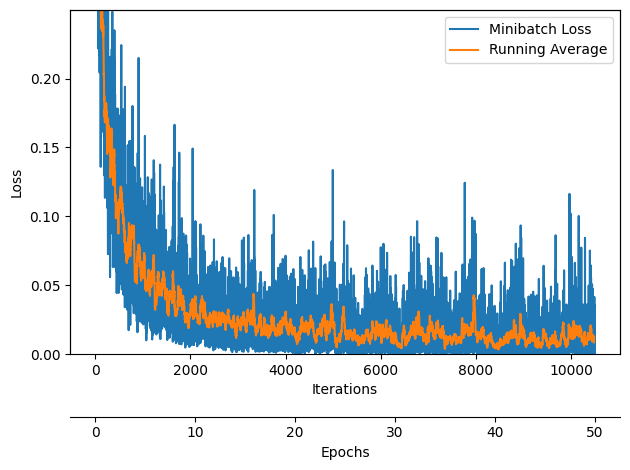

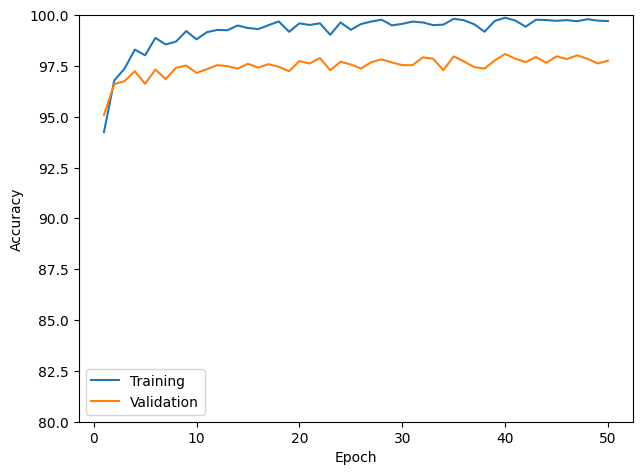

In [6]:
minibatch_loss_list, train_acc_list, valid_acc_list = train_model(model=model, 
                                                                  num_epochs=NUM_EPOCHS, 
                                                                  train_loader=train_loader,
                                                                  valid_loader=valid_loader, 
                                                                  test_loader=test_loader, 
                                                                  optimizer=optimizer,
                                                                  device=DEVICE)


plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()